# Example to connect to postgres

This is a tutorial to connect to our PostgreSQL database using python.

First you need to install the following libraries:
- psycopg2
- python-dotenv

Then you need to create a file with the name ".env". This file will contain the connection information and your credentials. This is an example:

```
DB_HOST=host_name
DB_NAME=postgres
DB_USER=my_user
DB_PASSWORD=my_password
DB_PORT=5432
```

After that you´re all set. We will import your credentials and connect to the database.

In [76]:
import os
import pandas as pd
import numpy as np
import os
import psycopg2 # PostgreSQL database adapter for Python
from dotenv import load_dotenv # Reads the key-value pair from .env file and adds them to environment variable
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.losses import MeanAbsoluteError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import load_model
from sklearn.metrics import mean_absolute_error

from sklearn.model_selection import train_test_split, GridSearchCV, TimeSeriesSplit
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [77]:
# Load environment variables from .env file
load_dotenv()

# Accessing credentials
db_host = os.getenv("DB_HOST")
db_name = os.getenv("DB_NAME")
db_user = os.getenv("DB_USER")
db_password = os.getenv("DB_PASSWORD")
db_port = os.getenv("DB_PORT")

In [78]:
# Connect to the database
conn = psycopg2.connect(
    host=db_host,
    dbname=db_name,
    user=db_user,
    password=db_password,
    port=db_port
)

Now we can query our data (write sql code) and store it as a pandas dataframe

In [79]:
query_main=query="""
    select * 
    from agg.tidy_data_30min
    where site = 64
"""
df_main = pd.read_sql_query(query_main, conn)

#agg.tidy_data_v2


C:\Users\Zóra\AppData\Local\Temp\ipykernel_26572\4189656495.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_main = pd.read_sql_query(query_main, conn)


In [80]:
pd.set_option('display.max_columns', None)

df_main

,timestamp,site,year,month,day,hour,minute,day_of_week,season,net_load,precipitation,precipitation_probability,wind_direction,wind_speed,solar_radiation,sunshine_duration,avg_net_load,q25_net_load,q75_net_load,median_net_load,weekend_or_bank_holiday
0,2019-04-12 05:30:00+00:00,64,2019,4,12,6,30,4,2,15.21,0.0,5.0,105.0,8.0,3.0,0.0,402.89,23.3025,336.98,204.90,0
1,2019-04-23 15:00:00+00:00,64,2019,4,23,16,0,1,2,-177.55,NaN,NaN,NaN,NaN,NaN,NaN,-27.63,-75.8800,12.71,2.03,0
2,2019-04-23 15:30:00+00:00,64,2019,4,23,16,30,1,2,4.58,NaN,NaN,NaN,NaN,NaN,NaN,-24.74,-34.7600,16.66,5.71,0
3,2019-04-23 16:00:00+00:00,64,2019,4,23,17,0,1,2,14.70,NaN,NaN,NaN,NaN,NaN,NaN,5.20,-11.6750,17.73,9.42,0
4,2019-04-23 16:30:00+00:00,64,2019,4,23,17,30,1,2,12.82,NaN,NaN,NaN,NaN,NaN,NaN,28.17,5.0250,28.62,15.78,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17534,2019-04-20 07:30:00+00:00,64,2019,4,20,8,30,5,2,267.43,0.0,7.0,66.0,7.0,105.0,51.0,30.33,-11.4100,60.86,13.56,1
17535,2019-04-20 08:00:00+00:00,64,2019,4,20,9,0,5,2,13.28,0.0,6.0,66.0,7.0,161.0,52.0,23.99,-9.9800,16.92,12.13,1
17536,2019-04-20 08:30:00+00:00,64,2019,4,20,9,30,5,2,13.42,0.0,6.0,66.0,7.0,161.0,52.0,-12.79,-10.4675,16.79,11.31,1
17537,2019-04-20 09:00:00+00:00,64,2019,4,20,10,0,5,2,-265.50,0.0,4.0,68.0,7.0,215.0,52.0,-26.56,-20.8475,14.31,7.48,1


In [81]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17539 entries, 0 to 17538
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype              
---  ------                     --------------  -----              
 0   timestamp                  17539 non-null  datetime64[ns, UTC]
 1   site                       17539 non-null  int64              
 2   year                       17539 non-null  int64              
 3   month                      17539 non-null  int64              
 4   day                        17539 non-null  int64              
 5   hour                       17539 non-null  int64              
 6   minute                     17539 non-null  int64              
 7   day_of_week                17539 non-null  int64              
 8   season                     17539 non-null  int64              
 9   net_load                   17539 non-null  float64            
 10  precipitation              17045 non-null  float64            
 11  pr

## Convert Convert 'ts' to datetime and set as index

In [82]:
df_main['datetime'] = pd.to_datetime(df_main['timestamp'])
df_main.set_index('datetime', inplace=True)

In [83]:
df_main

,timestamp,site,year,month,day,hour,minute,day_of_week,season,net_load,precipitation,precipitation_probability,wind_direction,wind_speed,solar_radiation,sunshine_duration,avg_net_load,q25_net_load,q75_net_load,median_net_load,weekend_or_bank_holiday
datetime,,,,,,,,,,,,,,,,,,,,,
2019-04-12 05:30:00+00:00,2019-04-12 05:30:00+00:00,64,2019,4,12,6,30,4,2,15.21,0.0,5.0,105.0,8.0,3.0,0.0,402.89,23.3025,336.98,204.90,0
2019-04-23 15:00:00+00:00,2019-04-23 15:00:00+00:00,64,2019,4,23,16,0,1,2,-177.55,NaN,NaN,NaN,NaN,NaN,NaN,-27.63,-75.8800,12.71,2.03,0
2019-04-23 15:30:00+00:00,2019-04-23 15:30:00+00:00,64,2019,4,23,16,30,1,2,4.58,NaN,NaN,NaN,NaN,NaN,NaN,-24.74,-34.7600,16.66,5.71,0
2019-04-23 16:00:00+00:00,2019-04-23 16:00:00+00:00,64,2019,4,23,17,0,1,2,14.70,NaN,NaN,NaN,NaN,NaN,NaN,5.20,-11.6750,17.73,9.42,0
2019-04-23 16:30:00+00:00,2019-04-23 16:30:00+00:00,64,2019,4,23,17,30,1,2,12.82,NaN,NaN,NaN,NaN,NaN,NaN,28.17,5.0250,28.62,15.78,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-04-20 07:30:00+00:00,2019-04-20 07:30:00+00:00,64,2019,4,20,8,30,5,2,267.43,0.0,7.0,66.0,7.0,105.0,51.0,30.33,-11.4100,60.86,13.56,1
2019-04-20 08:00:00+00:00,2019-04-20 08:00:00+00:00,64,2019,4,20,9,0,5,2,13.28,0.0,6.0,66.0,7.0,161.0,52.0,23.99,-9.9800,16.92,12.13,1
2019-04-20 08:30:00+00:00,2019-04-20 08:30:00+00:00,64,2019,4,20,9,30,5,2,13.42,0.0,6.0,66.0,7.0,161.0,52.0,-12.79,-10.4675,16.79,11.31,1


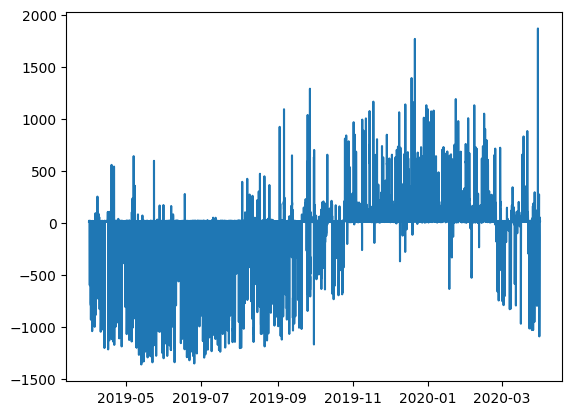

In [84]:
df_main = df_main.sort_values("datetime")
plt.plot(df_main.index, df_main.net_load)
plt.show()

In [85]:
df_main['net_load_norm'] = df_main['net_load'] / max(abs(df_main['net_load']))
df_main.drop('net_load',axis=1,inplace=True)
df_main.head()

,timestamp,site,year,month,day,hour,minute,day_of_week,season,precipitation,precipitation_probability,wind_direction,wind_speed,solar_radiation,sunshine_duration,avg_net_load,q25_net_load,q75_net_load,median_net_load,weekend_or_bank_holiday,net_load_norm
datetime,,,,,,,,,,,,,,,,,,,,,
2019-04-01 00:00:00+00:00,2019-04-01 00:00:00+00:00,64,2019,4,1,1,0,0,2,0.0,2.0,97.0,12.0,0.0,0.0,152.86,15.4150,138.56,18.69,0,0.007819
2019-04-01 00:30:00+00:00,2019-04-01 00:30:00+00:00,64,2019,4,1,1,30,0,2,0.0,2.0,97.0,12.0,0.0,0.0,204.52,15.3175,166.11,18.60,0,0.008931
2019-04-01 01:00:00+00:00,2019-04-01 01:00:00+00:00,64,2019,4,1,2,0,0,2,0.0,3.0,99.0,11.0,0.0,0.0,214.66,15.8375,179.70,31.03,0,0.010840
2019-04-01 01:30:00+00:00,2019-04-01 01:30:00+00:00,64,2019,4,1,2,30,0,2,0.0,3.0,99.0,11.0,0.0,0.0,209.72,15.8775,177.33,52.99,0,0.008487
2019-04-01 02:00:00+00:00,2019-04-01 02:00:00+00:00,64,2019,4,1,3,0,0,2,0.0,6.0,100.0,11.0,0.0,0.0,230.59,16.3350,212.62,65.21,0,0.008086


### Creating function for lagged net_load

In [86]:
#Creating function for lagged net_load

def create_lagged_features(df, lags):
    df_lagged = df.copy()
    for lag in lags:
        df_lagged[f'net_load_lag_{lag}'] = df_lagged['net_load_norm'].shift(lag)
    # Remove rows with NaN values due to shifting
    df_lagged = df_lagged.dropna()
    return df_lagged

# Define your lags
lags = [1,2,3,4,5,96,144,192]

# Prepare your dataset with lagged features
df_lagged = create_lagged_features(df_main, lags)

df_lagged

,timestamp,site,year,month,day,hour,minute,day_of_week,season,precipitation,precipitation_probability,wind_direction,wind_speed,solar_radiation,sunshine_duration,avg_net_load,q25_net_load,q75_net_load,median_net_load,weekend_or_bank_holiday,net_load_norm,net_load_lag_1,net_load_lag_2,net_load_lag_3,net_load_lag_4,net_load_lag_5,net_load_lag_96,net_load_lag_144,net_load_lag_192
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-04-05 00:00:00+00:00,2019-04-05 00:00:00+00:00,64,2019,4,5,1,0,4,2,0.0,31.0,80.0,6.0,0.0,0.0,295.95,16.8975,165.06,92.76,0,0.009781,0.007455,0.009482,0.007835,0.007508,0.007669,0.009385,0.008535,0.007819
2019-04-05 00:30:00+00:00,2019-04-05 00:30:00+00:00,64,2019,4,5,1,30,4,2,0.0,31.0,80.0,6.0,0.0,0.0,339.67,17.1625,235.58,91.80,0,0.009166,0.009781,0.007455,0.009482,0.007835,0.007508,0.010353,0.011573,0.008931
2019-04-05 01:00:00+00:00,2019-04-05 01:00:00+00:00,64,2019,4,5,2,0,4,2,0.0,36.0,66.0,4.0,0.0,0.0,337.62,17.5025,208.10,92.84,0,0.010364,0.009166,0.009781,0.007455,0.009482,0.007835,0.007835,0.009230,0.010840
2019-04-05 01:30:00+00:00,2019-04-05 01:30:00+00:00,64,2019,4,5,2,30,4,2,0.0,36.0,66.0,4.0,0.0,0.0,333.18,16.7625,204.62,93.85,0,0.008070,0.010364,0.009166,0.009781,0.007455,0.009482,0.009353,0.007808,0.008487
2019-04-05 02:00:00+00:00,2019-04-05 02:00:00+00:00,64,2019,4,5,3,0,4,2,0.0,40.0,39.0,4.0,0.0,0.0,372.40,17.7725,305.76,111.31,0,0.009418,0.008070,0.010364,0.009166,0.009781,0.007455,0.009541,0.008407,0.008086
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-29 20:30:00+00:00,2020-03-29 20:30:00+00:00,64,2020,3,29,21,30,6,2,0.0,1.0,45.0,16.0,0.0,0.0,319.19,14.7575,210.73,19.19,1,0.007658,0.007883,0.008220,0.007872,0.007514,0.007391,0.007375,0.007829,0.007786
2020-03-29 21:00:00+00:00,2020-03-29 21:00:00+00:00,64,2020,3,29,22,0,6,2,0.0,1.0,47.0,16.0,0.0,0.0,284.94,14.9600,201.26,16.96,1,0.007856,0.007658,0.007883,0.008220,0.007872,0.007514,0.007621,0.007658,0.008097
2020-03-29 21:30:00+00:00,2020-03-29 21:30:00+00:00,64,2020,3,29,22,30,6,2,0.0,1.0,47.0,16.0,0.0,0.0,261.92,15.1850,208.30,59.55,1,0.008006,0.007856,0.007658,0.007883,0.008220,0.007872,0.007840,0.007786,0.007663


#### get_input function

In [87]:
def get_input(ts, lags):
    # Convert lags to positions from the end of the series
    positions = [ - 1 - lag for lag in lags]
    # Use iloc to get values at positions
    return ts.iloc[positions].values.reshape(1, -1)

In [88]:
[ - 1 - lag for lag in lags]

[-2, -3, -4, -5, -6, -97, -145, -193]

Previous (wrong) rolling prediciton model

In [89]:
#def rolling_prediction(model, initial_ts, steps_ahead, lags):
    # 'initial_ts' is expected to be a Pandas Series with enough past observations to cover all lags.
    # initial_ts needs to be a series with at least 192 past observations.
    #HOW DO I MAKE SURE THSI IS THE CASE? I only have now lags 1,2,3,96,192
    #ts = initial_ts.copy()
    #predictions = []

    #for i in range(steps_ahead):
        # Get the input for the current prediction.
        # Ensure that 'get_input' retrieves the last known observations from 'ts'
        # for all required lags.
        #input_features = get_input(ts, lags)
        
        # Predict the next step using the RF model.
        #pred = model.predict(input_features)[0]
        
        # Append the prediction to the list of predictions.
        #predictions.append(pred)
        
        # Also append the prediction to 'ts' for subsequent predictions.
        # The 'ts' will now include the most recent prediction at the end.
        #ts = ts.append(pd.Series(pred), ignore_index=True)
        
    # Return only the predictions made, not the entire series.
    #return predictions

#### Create initial_ts by taking the last 192 observations (48 hours) from this point backward to cover all lags

In [90]:
# Assuming 'df_main' has a DateTimeIndex and 'net_load' is your target column.

# Identify the time point for initial_ts
end_time = df_main.index[-1]
start_time = end_time - pd.Timedelta(hours=24)  # 192 intervals of 15 minutes is equivalent to 48 hours

# Make sure you don't go out of bounds
if start_time < df_main.index[0]:
    raise ValueError("Not enough data points for the required lags.")

# Create initial_ts for rolling predictions
# We select the data between 'start_time' and 'end_time', including all necessary lags.
initial_ts = df_main.loc[start_time:end_time]['net_load_norm']

In [91]:
initial_ts

datetime
2020-03-30 22:30:00+00:00    0.009612
2020-03-30 23:00:00+00:00    0.008091
2020-03-30 23:30:00+00:00    0.007770
2020-03-31 00:00:00+00:00    0.017840
2020-03-31 00:30:00+00:00    0.025541
2020-03-31 01:00:00+00:00    0.019407
2020-03-31 01:30:00+00:00    0.018840
2020-03-31 02:00:00+00:00    0.022798
2020-03-31 02:30:00+00:00    0.026953
2020-03-31 03:00:00+00:00    0.027258
2020-03-31 03:30:00+00:00    0.049088
2020-03-31 04:00:00+00:00    0.053061
2020-03-31 04:30:00+00:00    0.047366
2020-03-31 05:00:00+00:00    0.045580
2020-03-31 05:30:00+00:00    0.147103
2020-03-31 06:00:00+00:00    0.031590
2020-03-31 06:30:00+00:00    0.033232
2020-03-31 07:00:00+00:00    0.004337
2020-03-31 07:30:00+00:00    0.004722
2020-03-31 08:00:00+00:00    0.005824
2020-03-31 08:30:00+00:00    0.007701
2020-03-31 09:00:00+00:00   -0.012888
2020-03-31 09:30:00+00:00   -0.016856
2020-03-31 10:00:00+00:00   -0.069030
2020-03-31 10:30:00+00:00   -0.240578
2020-03-31 11:00:00+00:00   -0.582664
202

### Define features and target, train and test

In [92]:
# Define features and target
y = df_lagged['net_load_norm']
X = df_lagged[[f'net_load_lag_{lag}' for lag in lags]]

# Split data into training and testing sets
#train_size = int(len(df_lagged) * 0.8)
#train_features, test_features = X.iloc[:train_size], X.iloc[train_size:]
#train_target, test_target = y.iloc[:train_size], y.iloc[train_size:]

# Reserve the last 96 observations for testing
train_features = X.iloc[:-96]
test_features = X.iloc[-96:]

train_target = y.iloc[:-96]
test_target = y.iloc[-96:]

### Model definition and training 

In [93]:
rf = RandomForestRegressor()

# TRAIN the model
rf.fit(train_features, train_target)

# TEST the model - Predict on the test set - Make predictions for the test set
y_pred = rf.predict(test_features)


In [94]:
# error metric MAE and normalized MAE
mae = mean_absolute_error(test_target, y_pred)
print(f'Mean Absolute Error: {mae}')

target_range = train_target.max() -train_target.min()
normalized_mae = mae / target_range
print(f'Normalized MAE: {normalized_mae}')

Mean Absolute Error: 0.026237021679363346
Normalized MAE: 0.015679157957993104


In [95]:
print(train_target.tail())
print(train_target.iloc[-2])
print(get_input(train_target, lags))

datetime
2020-03-27 18:30:00+00:00    0.007375
2020-03-27 19:00:00+00:00    0.007621
2020-03-27 19:30:00+00:00    0.007840
2020-03-27 20:00:00+00:00    0.007835
2020-03-27 20:30:00+00:00    0.007557
Name: net_load_norm, dtype: float64
0.007834601665320793
[[0.0078346  0.00783995 0.00762069 0.00737469 0.00831056 0.00865282
  0.00797365 0.00794691]]


In [96]:
input_features = get_input(train_target, lags)
pred = rf.predict(input_features)

print(input_features)
print(pred)

[[0.0078346  0.00783995 0.00762069 0.00737469 0.00831056 0.00865282
  0.00797365 0.00794691]]
[0.00769882]


C:\Users\Zóra\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [97]:
initial_ts

datetime
2020-03-30 22:30:00+00:00    0.009612
2020-03-30 23:00:00+00:00    0.008091
2020-03-30 23:30:00+00:00    0.007770
2020-03-31 00:00:00+00:00    0.017840
2020-03-31 00:30:00+00:00    0.025541
2020-03-31 01:00:00+00:00    0.019407
2020-03-31 01:30:00+00:00    0.018840
2020-03-31 02:00:00+00:00    0.022798
2020-03-31 02:30:00+00:00    0.026953
2020-03-31 03:00:00+00:00    0.027258
2020-03-31 03:30:00+00:00    0.049088
2020-03-31 04:00:00+00:00    0.053061
2020-03-31 04:30:00+00:00    0.047366
2020-03-31 05:00:00+00:00    0.045580
2020-03-31 05:30:00+00:00    0.147103
2020-03-31 06:00:00+00:00    0.031590
2020-03-31 06:30:00+00:00    0.033232
2020-03-31 07:00:00+00:00    0.004337
2020-03-31 07:30:00+00:00    0.004722
2020-03-31 08:00:00+00:00    0.005824
2020-03-31 08:30:00+00:00    0.007701
2020-03-31 09:00:00+00:00   -0.012888
2020-03-31 09:30:00+00:00   -0.016856
2020-03-31 10:00:00+00:00   -0.069030
2020-03-31 10:30:00+00:00   -0.240578
2020-03-31 11:00:00+00:00   -0.582664
202

### Rolling origin prediction

Create a function that performs sequential predictions over a specified number of steps, using each prediction as input for the next

In [98]:

def rolling_window_predictions(model, full_series, test_series, lags):
    """
    Generate rolling window predictions and plot against actual data.
    
    :model: pre-trained RF
    :full_series: COMPLETE time series data with both training and test data
    :test_series: series containing the TEST data with actual values to compare against
    :param lags: List of integers representing the lag intervals.
    """
    initial_ts = full_series.copy()#[-max(lags):] # Initial time series for rolling predictions    
    predictions = []  # Store out-of-sample predictions
    
    for actual_value in test_series: # Iterate over the test set to predict one step ahead each time
        
        #print("pre func")
        input_features = get_input(initial_ts, lags).reshape(1, -1) # Get the input features for the current prediction
        #print("post func")

        pred = model.predict(input_features)[0] # Predict the next time step and store the prediction
        predictions.append(pred)
        
        # Append the actual observed value to roll the window forward
        initial_ts = pd.concat([initial_ts, pd.Series([pred])], ignore_index=True)
        
        # Ensure that initial_ts only contains the most recent data needed for the next prediction
        #if len(initial_ts) > max(lags):
         #   initial_ts = initial_ts.tail(max(lags))
        
    plt.figure(figsize=(15, 7))
    plt.plot(test_series.index, test_series, label='Actual Data', color='blue')
    plt.plot(test_series.index, predictions, label='Rolling Window Predictions', color='orange')
    plt.legend()
    plt.xlabel('Date Time')
    plt.ylabel('Normalised Net Load')
    plt.title('Rolling Window Predictions vs Actual Data')
    plt.show()
    
    return predictions

In [99]:
predicted_values = rolling_window_predictions(rf, train_target, test_target, lags=[1,2,3,96,192])

C:\Users\Zóra\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


ValueError: X has 5 features, but RandomForestRegressor is expecting 8 features as input.

In [ ]:
def get_input_2(ts, lags):
    return np.array([ts.iloc[-lag] if lag <= len(ts) else 0 for lag in lags]).reshape(1, -1)


In [ ]:
def rolling_window_predictions_2(model, full_series, test_series, lags):
    """
    Generate rolling window predictions and plot against actual data.
    
    :model: pre-trained RF
    :full_series: COMPLETE time series data with both training and test data
    :test_series: series containing the TEST data with actual values to compare against
    :param lags: List of integers representing the lag intervals.
    """
    initial_ts = full_series[-max(lags):] # Initial time series for rolling predictions    
    predictions = []  # Store out-of-sample predictions
    
    for time_step in range(len(test_series)): # Iterate over the test set to predict one step ahead each time
        
        #print("pre func")
        
        input_features = get_input(initial_ts, lags)#.reshape(1, -1) # Get the input features for the current prediction
        #input_features = get_input_2(initial_ts, lags)
        
        #print("post func")

        pred = model.predict(input_features)[0] # Predict the next time step and store the prediction
        predictions.append(pred)

            # Calculate the next timestamp by adding the 15-minute interval
        next_timestamp = initial_ts.index[-1] + pd.Timedelta(minutes=15)

        if len(predictions) != len(test_series):
            print("Mismatch: The predictions and actual values are not aligned.")
        
        # Append the actual observed value to roll the window forward
        temp_df = pd.DataFrame([pred], index=[next_timestamp], columns=['net_load'])
        initial_ts = pd.concat([initial_ts, temp_df])
        initial_ts = initial_ts.tail(max(lags))
        #initial_ts = pd.concat([initial_ts, pd.Series([pred])], ignore_index=True)
        #initial_ts = initial_ts.append(pd.Series(pred)).iloc[-max(lags):]
        
        # Ensure that initial_ts only contains the most recent data needed for the next prediction
        #if len(initial_ts) > max(lags):
        #initial_ts = initial_ts.tail(max(lags))
        
    plt.figure(figsize=(15, 7))
    plt.plot(test_series.index, test_series, label='Actual Data', color='blue')
    plt.plot(test_series.index, predictions, label='Rolling Window Predictions', color='orange')
    plt.legend()
    plt.xlabel('Date Time')
    plt.ylabel('Normalised Net Load')
    plt.title('Rolling Window Predictions vs Actual Data')
    plt.show()
    
    return predictions

C:\Users\Zóra\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Zóra\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Zóra\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Zóra\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:

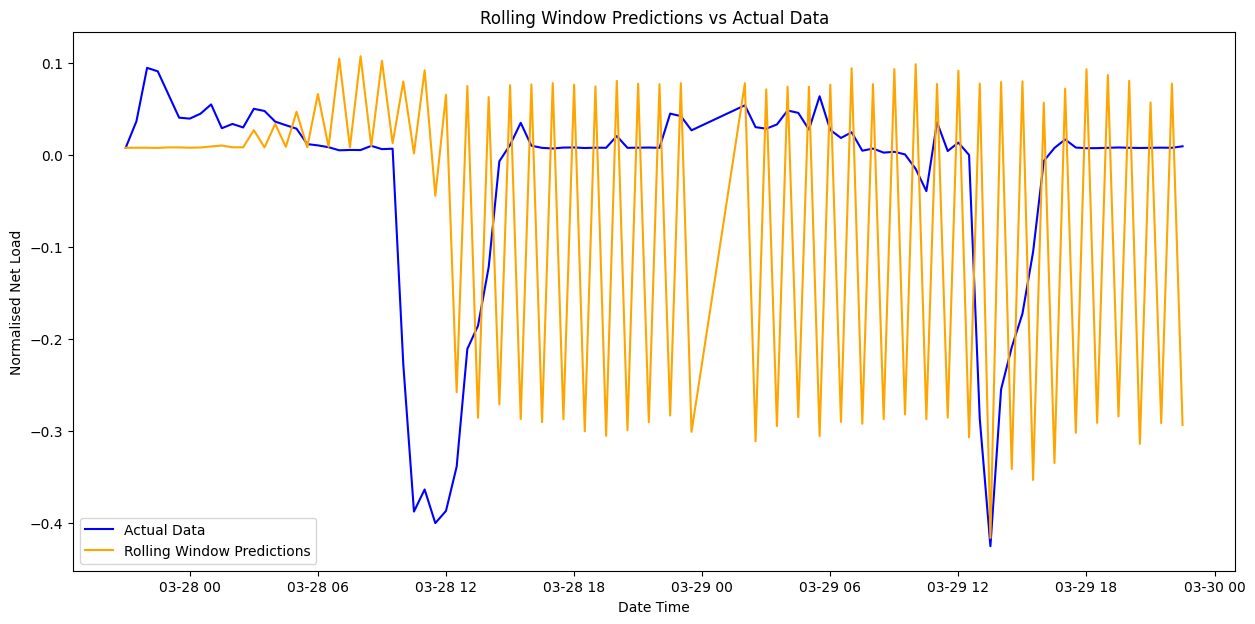

In [ ]:
predicted_values = rolling_window_predictions(rf, train_target, test_target, lags=[1,2,3,96,192])

In [ ]:
def get_input_features_df(ts, lags):
    # Create a DataFrame for input features with proper column names
    features = pd.DataFrame(index=[0])
    for lag in lags:
        # Use iloc for position-based indexing
        index_position = -lag if lag <= len(ts) else None
        features[f'net_load_lag_{lag}'] = ts.iloc[index_position]
    return features

In [ ]:
def rolling_window_predictions_2(model, full_series, test_series, lags):
    initial_ts = full_series[-max(lags):]
    predictions = []

    for time_step in range(len(test_series)):
        input_features_df = get_input_2(initial_ts, lags)  # Make sure this returns a DataFrame
        pred = model.predict(input_features_df)[0]
        predictions.append(pred)

        # Create the next timestamp
        next_timestamp = initial_ts.index[-1] + pd.Timedelta(minutes=15)
        # Append the predicted value with its timestamp
        temp_df = pd.DataFrame([pred], index=[next_timestamp], columns=['net_load'])
        initial_ts = pd.concat([initial_ts, temp_df])
        initial_ts = initial_ts.tail(max(lags))
        #initial_ts = full_series[-max(lags):]

    # After the loop, check for a mismatch
    if len(predictions) != len(test_series):
        print("Mismatch: The number of predictions does not match the number of actual values.")

    # Plotting
    plt.figure(figsize=(15, 7))
    plt.plot(test_series.index, test_series, label='Actual Data', color='blue')
    plt.plot(test_series.index, predictions, label='Rolling Window Predictions', color='orange')
    plt.legend()
    plt.xlabel('Date Time')
    plt.ylabel('Normalised Net Load')
    plt.title('Rolling Window Predictions vs Actual Data')
    plt.show()

    return predictions


In [ ]:
predicted_values = rolling_window_predictions_2(rf, train_target, test_target, lags=[1,2,3,96,192])

C:\Users\Zóra\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Zóra\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


ValueError: X has 10 features, but RandomForestRegressor is expecting 5 features as input.

In [ ]:
def get_input_2(ts, lags):
    return np.array([ts.iloc[-lag] if lag <= len(ts) else 0 for lag in lags]).reshape(1, -1)

def get_input(ts, lags):
    # Convert lags to positions from the end of the series
    positions = [ - 1 - lag for lag in lags]
    # Use iloc to get values at positions
    return ts.iloc[positions].values.reshape(1, -1) #what is the difference between these two get_input functions. Can you explain what does each one do?

def get_input_2(ts, lags):
    # Assuming ts is a pandas Series with DateTimeIndex
    lagged_values = [ts.shift(lag) for lag in lags]
    # Combine lagged values into a DataFrame
    input_df = pd.concat(lagged_values, axis=1)
    # Rename columns to match training feature names
    input_df.columns = [f'net_load_lag_{lag}' for lag in lags]
    return input_df.iloc[-1:].values  # Return the last row as input features

In [ ]:
print(get_input_2(train_target, lags))
print(get_input(train_target, lags))

[[0.0107016  0.00703711 0.00746151 0.00713581 0.00746151]]
[[0.00703711 0.00746151 0.00677063 0.01029976 0.00730359]]


In [ ]:
predicted_values = rolling_window_predictions_2(rf, train_target, test_target, lags=[1,2,3,96,192])

C:\Users\Zóra\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Zóra\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


ValueError: X has 10 features, but RandomForestRegressor is expecting 5 features as input.

In [ ]:
def rolling_window_predictions_3(model, full_series, test_series, lags):
    """
    Generate rolling window predictions and plot against actual data.
    
    :model: pre-trained RF
    :full_series: COMPLETE time series data with both training and test data
    :test_series: series containing the TEST data with actual values to compare against
    :param lags: List of integers representing the lag intervals.
    """
    initial_ts = full_series[-max(lags):] # Initial time series for rolling predictions    
    predictions = []  # Store out-of-sample predictions
    
    for time_step in range(len(test_series)): # Iterate over the test set to predict one step ahead each time
        
        #print("pre func")
        input_features = get_input_2(initial_ts, lags)#.reshape(1, -1) # Get the input features for the current prediction
        #print("post func")

        pred = model.predict(input_features)[0] # Predict the next time step and store the prediction
        predictions.append(pred)

        #if len(predictions) != len(test_series):
            #print("Mismatch: The predictions and actual values are not aligned.")
        
        # Update initial_ts by appending the prediction at the correct frequency
        next_timestamp = initial_ts.index[-1] + pd.Timedelta(minutes=15) # assumes 15-minute intervals
        initial_ts = initial_ts = pd.concat([initial_ts, pd.Series([pred])], ignore_index=True)

        # Drop the oldest observation to maintain the series size
        initial_ts = initial_ts.tail(max(lags))

        
        # Append the actual observed value to roll the window forward
        #initial_ts = pd.concat([initial_ts, pd.Series([pred])], ignore_index=True)
        #initial_ts = initial_ts.append(pd.Series(pred)).iloc[-max(lags):]
        
        # Ensure that initial_ts only contains the most recent data needed for the next prediction
        #if len(initial_ts) > max(lags):
         #   initial_ts = initial_ts.tail(max(lags))
        
    plt.figure(figsize=(15, 7))
    plt.plot(test_series.index, test_series, label='Actual Data', color='blue')
    plt.plot(test_series.index, predictions, label='Rolling Window Predictions', color='orange')
    plt.legend()
    plt.xlabel('Date Time')
    plt.ylabel('Normalised Net Load')
    plt.title('Rolling Window Predictions vs Actual Data')
    plt.show()
    
    return predictions

In [ ]:
predicted_values = rolling_window_predictions_3(rf, train_target, test_target, lags=[1,2,3,96,192])

C:\Users\Zóra\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Zóra\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


TypeError: unsupported operand type(s) for +: 'int' and 'Timedelta'

# . 

# . 

### Rolling origin prediction for multiple steps ahead - Wrong approaches

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def rolling_window_predictions(model, full_series, steps_ahead, lags):
    """
    Generate rolling window predictions for a specified number of steps ahead.

    :param model: The pre-trained machine learning model.
    :param full_series: Complete time series data, containing both training and (optionally) test data.
    :param steps_ahead: Number of future steps to predict.
    :param lags: List of integers representing the lag intervals.
    :return: A tuple (predictions, prediction_series) containing the list of prediction values and
             the corresponding pandas Series with timestamps.
    """
    # Initialize the initial time series for rolling predictions
    initial_ts = full_series[-max(lags):]
    
    # Store the out-of-sample predictions
    predictions = []
    
    # Iterate to predict the specified number of steps ahead
    for step in range(steps_ahead):
        # Get the input features for the current prediction
        input_features = get_input(initial_ts, lags).reshape(1, -1)
        
        # Predict the next time step and store the prediction
        pred = model.predict(input_features)[0]
        predictions.append(pred)
        
        # Append the predicted value to roll the window forward
        initial_ts = pd.concat([initial_ts, pd.Series([pred])], ignore_index=True)
        
        # Ensure that initial_ts only contains the most recent data needed for the next prediction
        if len(initial_ts) > max(lags):
            initial_ts = initial_ts.tail(max(lags))
    
    # Generate the datetime index for the prediction series
    last_timestamp = full_series.index[-1]
    prediction_index = pd.date_range(start=last_timestamp, periods=steps_ahead, freq='15T')
    
    # Create the prediction series
    prediction_series = pd.Series(data=predictions, index=prediction_index)

    # Plot the prediction series
    plt.figure(figsize=(15, 7))
    plt.plot(prediction_series.index, prediction_series, label='Rolling Window Predictions', color='red')
    plt.legend()
    plt.xlabel('Date Time')
    plt.ylabel('Net Load')
    plt.title('Rolling Window Predictions')
    plt.show()
    
    return predictions, prediction_series

# Usage example:
# rf_model - your pre-trained RandomForestRegressor
# df_main['net_load'] - the full series including training data
# steps_ahead - how far into the future you want to predict
# lags - the lags used for predictions

# Example call to the function:
predicted_values, prediction_series = rolling_window_predictions(rf, df_main['net_load_norm'], steps_ahead=30*24*4, lags=[1,2,3,96,192])


IndexError: positional indexers are out-of-bounds

In [ ]:
def rolling_window_predictions_steps(model, full_series, test_series, lags, steps_ahead):
    """
    Generate rolling window predictions for a specified number of steps ahead and plot against actual data.
    
    :param model: The pre-trained machine learning model.
    :param full_series: Complete time series data, containing both training and test data.
    :param test_series: Series containing the test data with actual values to compare against.
    :param lags: List of integers representing the lag intervals.
    :param steps_ahead: Integer, number of future steps to predict.
    """
    # Initialize the initial time series for rolling predictions
    initial_ts = full_series[-max(lags):]
    
    # Store the out-of-sample predictions
    predictions = []
    
    # Use a counter to keep track of the number of steps predicted
    steps_predicted = 0
    
    # Iterate over the test set to predict one step ahead each time
    for actual_value in test_series:
        if steps_predicted >= steps_ahead:
            break  # Stop prediction if we reached the desired number of steps
        
        # Get the input features for the current prediction
        input_features = get_input(initial_ts, lags).reshape(1, -1)
        
        # Predict the next time step and store the prediction
        pred = model.predict(input_features)[0]
        predictions.append(pred)
        
        # Append the actual observed value to roll the window forward
        initial_ts = pd.concat([initial_ts, pd.Series([actual_value])], ignore_index=True)
        
        # Ensure that initial_ts only contains the most recent data needed for the next prediction
        if len(initial_ts) > max(lags):
            initial_ts = initial_ts.tail(max(lags))
        
        # Increment the counter
        steps_predicted += 1
    
    # Generate an index for the predicted values (assuming test_series has a DateTime index)
    predicted_index = pd.date_range(start=test_series.index[0], periods=steps_predicted, freq=test_series.index.freq)
    
    # Plot the actual vs predicted data up to the steps ahead
    plt.figure(figsize=(15, 7))
    plt.plot(predicted_index, test_series[:steps_predicted], label='Actual Data', color='blue')
    plt.plot(predicted_index, predictions, label='Rolling Window Predictions', color='red', linestyle='--')
    plt.legend()
    plt.xlabel('Date Time')
    plt.ylabel('Net Load')
    plt.title('Rolling Window Predictions vs Actual Data')
    plt.show()
    
    return predictions

# Example call to the function with steps_ahead parameter:
predicted_values = rolling_window_predictions_steps(
    rf, df_main['net_load'], test_target, lags=[1,2,3,96,192], steps_ahead=720  # For example, 720 steps of 15 minutes each
)


KeyError: 'net_load'

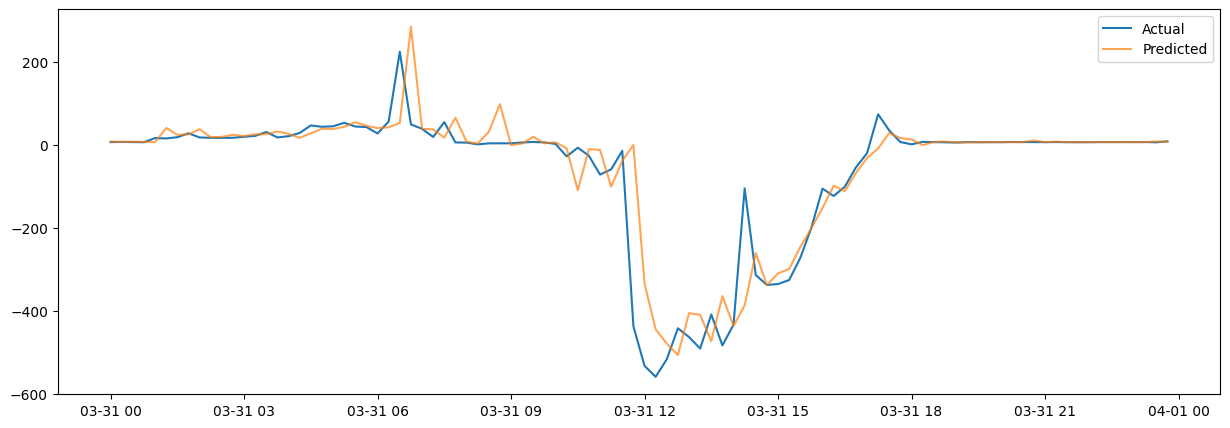

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(test_target.index, test_target, label='Actual')
plt.plot(test_target.index, y_pred, label='Predicted', alpha=0.7)
plt.legend()
plt.show()